In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('data/health.csv')
data = data.drop(columns = ['Unnamed: 0', 'index', 'CASEID'])
data

,SNRLGSVC,SNRLGIMP,SNRLDCSN,SNRLFRND,YEAR,Tabacco_Flag,Alcohol_Flag,Marijunana_Flag,Marijuana_Only_Flag,Cocaine_Flag,...,svrl_days_depressed,lifetime_mde,pst_yr_mde,CATAG6,HEALTH,IRSEX,IRMARIT,EDUCCAT2,NEWRACE2,EMPSTATY
0,6-24,Agree,Agree,Agree,2010,1,1,1,1,0,...,1.0,1.0,1.0,A-18-25,H_Very_good,Male,Not_Married,Some_college,Black/Afr_Am,E_full_time
1,3-5,Disagree,Disagree,Strongly Disagree,2010,1,1,1,1,0,...,0.0,1.0,1.0,A-18-25,H_Excellent,Female,Married,Some_college,White,E_full_time
2,99,99,99,99,2010,0,1,1,1,0,...,0.0,1.0,0.0,A-12-17,H_Good,Female,Not_Married,Edu_youth,Hispanic,E_Other
3,1-2,Agree,Agree,Disagree,2010,1,1,0,0,0,...,0.0,0.0,1.0,A-18-25,H_Fair,Female,Not_Married,Less_than_high_school,White,E_Other
4,6-24,Strongly Agree,Strongly Agree,Agree,2010,1,0,0,0,0,...,1.0,1.0,1.0,A-50-64,H_Fair,Female,Divorced_Separated,High_school_graduate,White,E_Unemployed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280320,25-52,Strongly Agree,Agree,Disagree,2014,1,1,0,0,0,...,1.0,1.0,1.0,A-18-25,H_Very_good,Female,Not_Married,High_school_graduate,White,E_full_time
280321,3-5,Strongly Disagree,Agree,Disagree,2014,0,0,0,0,0,...,0.0,0.0,0.0,A-35-49,H_Fair,Female,Divorced_Separated,High_school_graduate,White,E_Other
280322,25-52,Strongly Agree,Strongly Agree,Disagree,2014,1,1,1,0,1,...,1.0,1.0,1.0,A-35-49,H_Excellent,Male,Married,College_graduate,White,E_full_time
280323,6-24,Agree,Agree,Strongly Disagree,2014,0,0,0,0,0,...,0.0,0.0,0.0,A-18-25,H_Very_good,Female,Not_Married,Some_college,White,E_part_time


### Create Suicide Risk

- plan1: think(1), plan(2), attempt(3) : doesn't work out, attempt doesn't ensure plan, and plan doesnt ensure thinking: for people who actually tried, half of them didn't have any plan, and some of them havent thought about killing themselves: something we could put into the slide as an interesting finding (might include some graphs as well)

- plan 2: think(1), think+plan(2), think+plan+attempt(3), but what about those who are attempt only, or plan only, or attempt+think?

- plan 3: think (+1), plan (+2), attempt (+3)


In [3]:
suic = data[['suic_thought_pst_12month', 'suic_thought_pst_yr', 'suic_plan', 'suic_attempt']]
suic

,suic_thought_pst_12month,suic_thought_pst_yr,suic_plan,suic_attempt
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
280320,1.0,0.0,0.0,0.0
280321,0.0,1.0,1.0,0.0
280322,1.0,0.0,0.0,0.0
280323,1.0,0.0,0.0,0.0


In [4]:
suicide_risk = suic['suic_thought_pst_yr'] + 2*suic['suic_plan'] + 3*suic['suic_attempt']
suicide_risk.value_counts()

0.0    262867
1.0     11561
3.0      2781
2.0      1369
6.0      1312
4.0       420
5.0        15
Name: count, dtype: int64

In [5]:
data = data.assign(suicide_risk = suicide_risk)
data = data.drop(columns = ['YEAR', 'Age_First_Use', 'Year_First_Use', 
                            'CPN_Meth_Flag', 'Any_Drug_Past_Year', 'Any_Drug_Past_Month'])


In [6]:
data.columns

Index(['SNRLGSVC', 'SNRLGIMP', 'SNRLDCSN', 'SNRLFRND', 'Tabacco_Flag',
       'Alcohol_Flag', 'Marijunana_Flag', 'Marijuana_Only_Flag',
       'Cocaine_Flag', 'Crack_Flag', 'Herion_Flag', 'Hallcinogens_Flag',
       'Inhalants_Flag', 'Painkiller_Flag', 'Tranquilizer_Flag',
       'Stimulant Flag', 'Meth_Flag', 'Sedatives Flag', 'Any_Drug_Flag',
       'Drug_Not_Marijunana', 'Ever_Steal_50', 'Sell_Illegal_Drugs',
       'Ever_Booked_Arrested', 'Drug_or_Alc_Past_year', 'inpatient',
       'outpatient', 'needed_not_rcvd', 'rcvd_any_tmt',
       'suic_thought_pst_12month', 'psych_distress_month', 'psych_distress_yr',
       'suic_thought_pst_yr', 'suic_plan', 'suic_attempt', 'whodas_score',
       'predicted_ment_ill', 'svrl_days_depressed', 'lifetime_mde',
       'pst_yr_mde', 'CATAG6', 'HEALTH', 'IRSEX', 'IRMARIT', 'EDUCCAT2',
       'NEWRACE2', 'EMPSTATY', 'suicide_risk'],
      dtype='object')

In [7]:
data = data[data['SNRLGSVC'] != '99']
data = data[data['SNRLGIMP'] != '99']
data = data[data['SNRLDCSN'] != '99']
data = data[data['SNRLFRND'] != '99']
data = data[data['Sell_Illegal_Drugs'] != '97']
data = data[data['Sell_Illegal_Drugs'] != '94']

In [8]:
data['SNRLGSVC'].replace(['0', '1-2', '3-5', '6-24', '25-52', '52+', '99'],
                        [0, 1, 2, 3, 4, 5, 6], inplace=True)
data['SNRLGIMP'].replace(['Strongly Agree', 'Agree', 'Disagree', 'Strongly Disagree'],
                        [0, 1, 2, 3], inplace=True)
data['SNRLDCSN'].replace(['Strongly Agree', 'Agree', 'Disagree', 'Strongly Disagree'],
                        [0, 1, 2, 3], inplace=True)
data['SNRLFRND'].replace(['Strongly Agree', 'Agree', 'Disagree', 'Strongly Disagree'],
                        [0, 1, 2, 3], inplace=True)
data['Ever_Steal_50'].replace(['0', '1-2', '3-5', '6-9', '>=10'],
                        [0, 1, 2, 3, 4], inplace=True)
data['Sell_Illegal_Drugs'].replace(['0', '1-2', '3-5', '6-9', '>=10'],
                        [0, 1, 2, 3, 4], inplace=True)
data['Ever_Booked_Arrested'].replace(['No', 'Yes'],
                        [0, 1], inplace=True)
data['Drug_or_Alc_Past_year'].replace(['No/Unknown', 'Yes'],
                        [0, 1], inplace=True)

data['CATAG6'].replace(['A-18-25', 'A-26-34', 'A-35-49','A-50-64','A-65' ], #AGE CATEGORY RECODE 
                        [0, 1, 2, 3, 4], inplace=True)
data['HEALTH'].replace(['H_Very_good', 'H_Excellent', 'H_Good', 'H_Fair', 'H_Poor'],
                        [0, 1, 2, 3, 4], inplace=True)
data['IRSEX'].replace(['Male', 'Female'],
                        [0, 1], inplace=True)
data['IRMARIT'].replace(['Not_Married', 'Married', 'Divorced_Separated', 'Widowed'],
                        [0, 1, 2, 3], inplace=True)
data['EDUCCAT2'].replace(['Less_than_high_school', 'High_school_graduate', 'Some_college','College_graduate'],
                        [0, 1, 2, 3], inplace=True)
data['NEWRACE2'].replace(['Black/Afr_Am', 'White', 'Hispanic', 'more_than_one_race', 'Asian',
 'Native_Am/AK_Native', 'Native_HI/Other_Pac_Isl'],
                        [0, 1, 2, 3, 4, 5, 6], inplace=True)
data['EMPSTATY'].replace(['E_full_time', 'E_Other', 'E_Unemployed', 'E_part_time'],
                        [0, 1, 2, 3], inplace=True)

In [9]:
map_col = {'SNRLGSVC':'RELIG_SERVICES_12month', 'SNRLGIMP':'RELIG_IMPORTANT', 
           'SNRLDCSN':'RELIG_influ_decision', 'SNRLFRND': 'friend_SHARE_REL', 
           'CATAG6':'age'}
data = data.rename(columns=map_col)

In [10]:
import numpy as np
def normalize(series):
    """
    normalize a series
    """
    array = np.array(series)
    array_norm = (array-np.min(array))/(np.max(array)-np.min(array))
    return pd.Series(array_norm)

norm_data = pd.DataFrame()
for col in data.columns:
    norm_data[col] = normalize(data[col])

In [11]:
norm_data.to_csv('data/new_health.csv')

In [12]:
# from sklearn.manifold import TSNE, MDS

# X = data[['Tabacco_Flag', 'Alcohol_Flag', 'Marijunana_Flag', 'Marijuana_Only_Flag', 'Cocaine_Flag']].values.tolist()
# y = pd.factorize(data['suicide_risk'])[0]
# y = y.tolist()

# dims = TSNE(random_state=42).fit_transform(X)
# dim1, dim2 = dims[:, 0], dims[:, 1]
# sns.scatterplot(x=dim1, y=dim2, hue=y, palette='tab10', legend=False)
# plt.title('t-SNE')

In [13]:
print(suic[suic['suic_thought_pst_yr'] == 1.0].suic_plan.value_counts())
#for those who have thought about it, few of them made plan

print(suic[suic['suic_thought_pst_yr'] == 0.0].suic_plan.value_counts())
#for those who have never thought about it, small porportion of them made plan

print(suic[suic['suic_thought_pst_yr'] == 1.0].suic_attempt.value_counts())
#for those who have thought ab it, only have few actually tried

print(suic[suic['suic_thought_pst_yr'] == 0.0].suic_attempt.value_counts())
#for those who have never thought ab it, a very small porportion of them have few actually tried

print(suic[suic['suic_attempt'] == 1.0].suic_plan.value_counts())
#for those who have attempted suicide, half made plan

print(suic[suic['suic_attempt'] == 1.0].suic_thought_pst_yr.value_counts())
#for those who have attempted suicide, majority thought about it

print(suic[suic['suic_plan'] == 1.0].suic_thought_pst_yr.value_counts())
#for those who have made plan, majority have thought ab it

suic[suic['suic_plan'] == 0.0].suic_thought_pst_yr.value_counts()
#for those who dont have any plan, only a few thought about it

suic_plan
0.0    11981
1.0     3327
Name: count, dtype: int64
suic_plan
0.0    263633
1.0      1384
Name: count, dtype: int64
suic_attempt
0.0    13576
1.0     1732
Name: count, dtype: int64
suic_attempt
0.0    264236
1.0       781
Name: count, dtype: int64
suic_plan
1.0    1327
0.0    1186
Name: count, dtype: int64
suic_thought_pst_yr
1.0    1732
0.0     781
Name: count, dtype: int64
suic_thought_pst_yr
1.0    3327
0.0    1384
Name: count, dtype: int64


suic_thought_pst_yr
0.0    263633
1.0     11981
Name: count, dtype: int64

## Explore Linear Correlation Between Every Feature and "Suicide-Risk" (Predictive Variable)

In [14]:
norm_data['suicide_risk'].value_counts()

suicide_risk
0.000000    178945
0.166667      6795
0.500000      1896
1.000000      1279
0.666667       374
0.333333         6
Name: count, dtype: int64

### Overall Correlation

In [15]:
correlation_df = norm_data.corr().sort_values('suicide_risk', ascending = False) # using new_health.csv
# a dictionary whose values are the correlation score between each feature and suicide_risk, sorted in order
corr_in_order = {}
for col in correlation_df:
    corr_in_order[col] = correlation_df['suicide_risk'].loc[col].round(3)
corr_in_order = sorted(corr_in_order.items(), key=lambda item: abs(item[1]), reverse = True)
corr_in_order

[('suicide_risk', 1.0),
 ('suic_plan', 0.858),
 ('suic_attempt', 0.819),
 ('suic_thought_pst_yr', 0.764),
 ('suic_thought_pst_12month', -0.582),
 ('predicted_ment_ill', 0.459),
 ('psych_distress_yr', 0.301),
 ('psych_distress_month', 0.299),
 ('pst_yr_mde', -0.292),
 ('whodas_score', 0.262),
 ('lifetime_mde', -0.245),
 ('needed_not_rcvd', -0.243),
 ('inpatient', -0.229),
 ('outpatient', -0.179),
 ('rcvd_any_tmt', -0.178),
 ('svrl_days_depressed', -0.162),
 ('Ever_Steal_50', 0.091),
 ('Sell_Illegal_Drugs', 0.076),
 ('HEALTH', 0.072),
 ('age', -0.065),
 ('EDUCCAT2', -0.053),
 ('RELIG_IMPORTANT', 0.052),
 ('RELIG_influ_decision', 0.052),
 ('Ever_Booked_Arrested', 0.046),
 ('EMPSTATY', 0.045),
 ('IRMARIT', -0.042),
 ('friend_SHARE_REL', 0.04),
 ('RELIG_SERVICES_12month', -0.039),
 ('Drug_Not_Marijunana', 0.039),
 ('Painkiller_Flag', 0.038),
 ('Tranquilizer_Flag', 0.037),
 ('Any_Drug_Flag', 0.034),
 ('Drug_or_Alc_Past_year', 0.032),
 ('Marijunana_Flag', 0.029),
 ('Crack_Flag', 0.029),
 ('Ha

/Users/vickyli/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


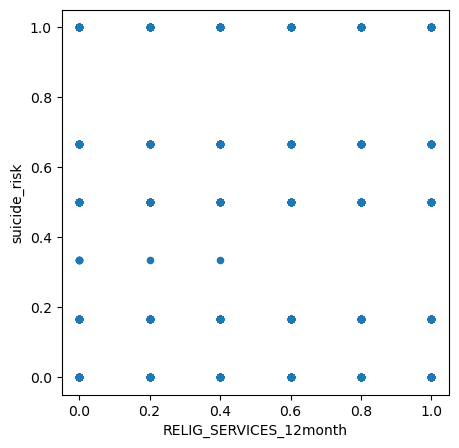

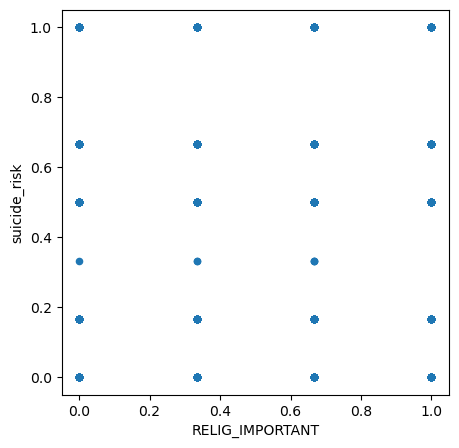

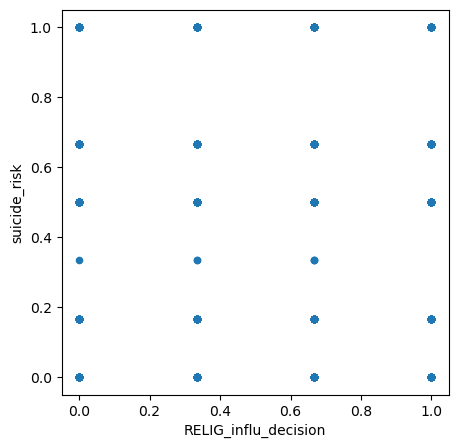

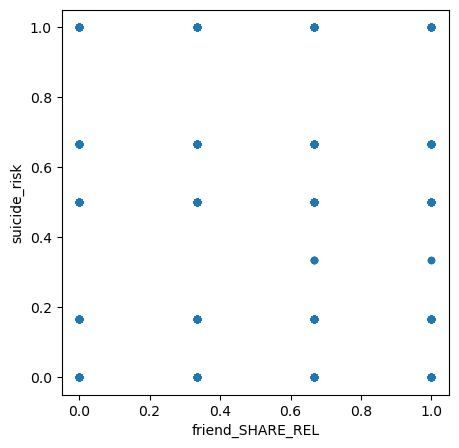

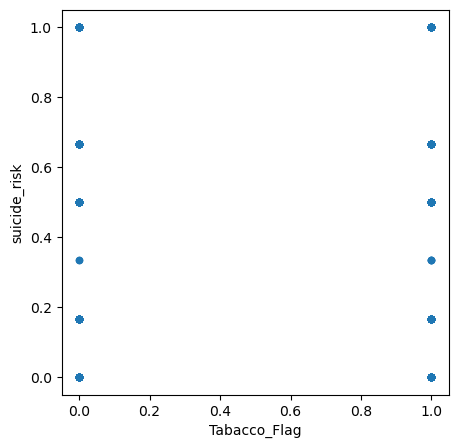

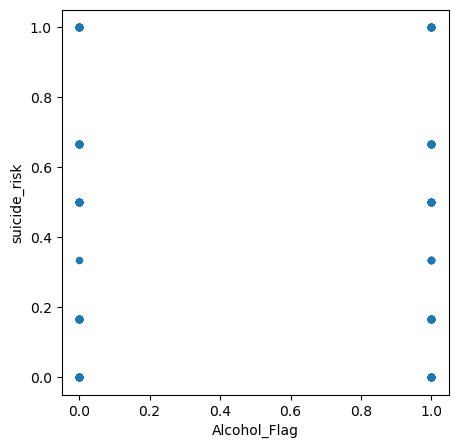

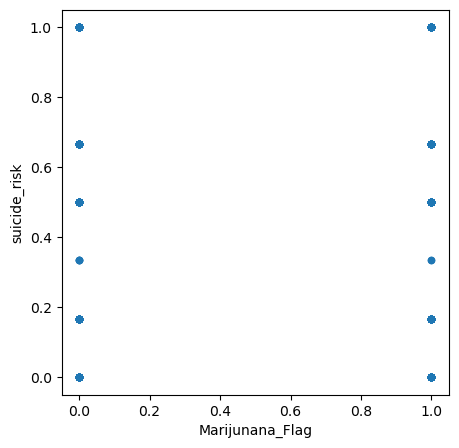

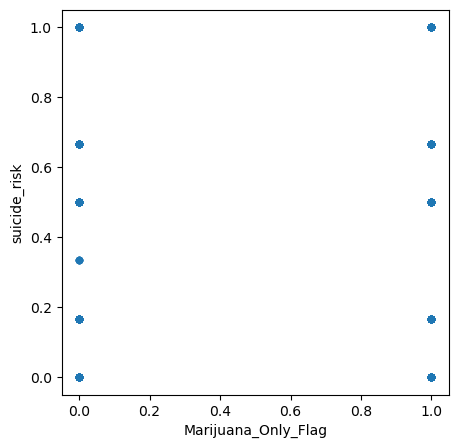

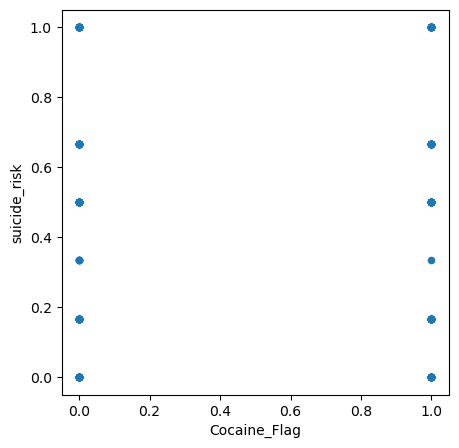

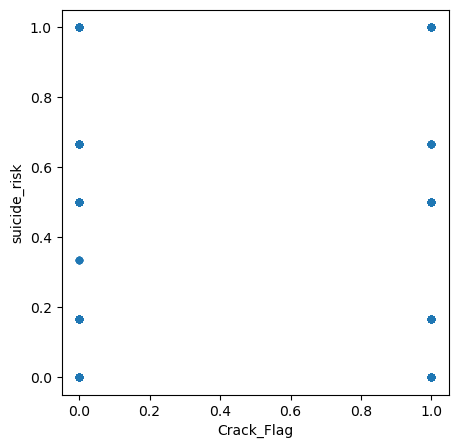

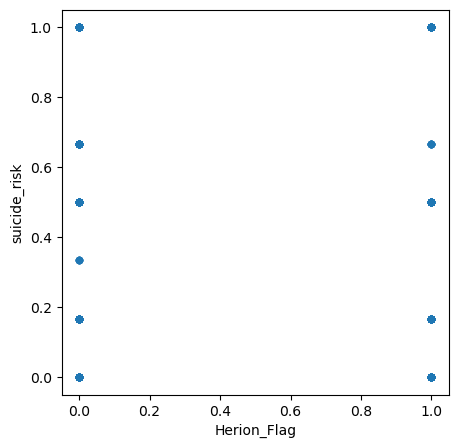

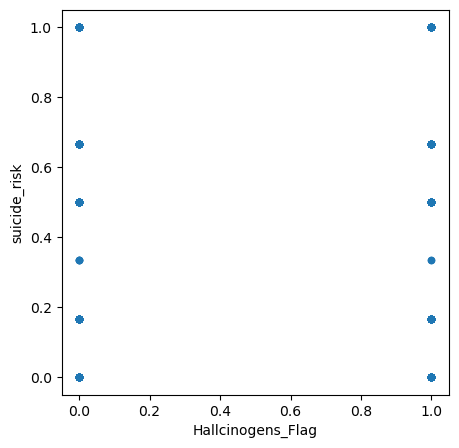

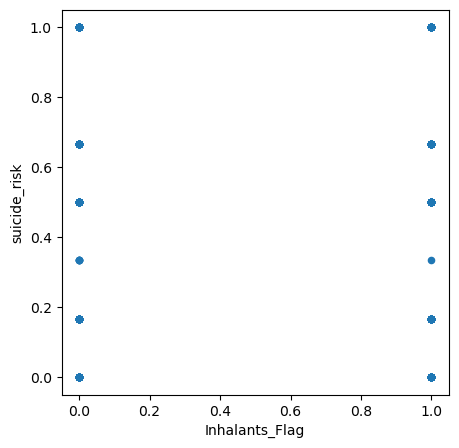

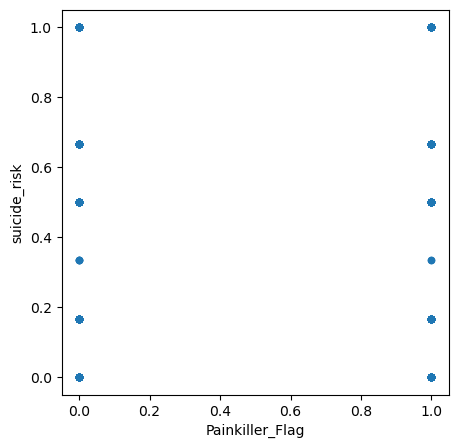

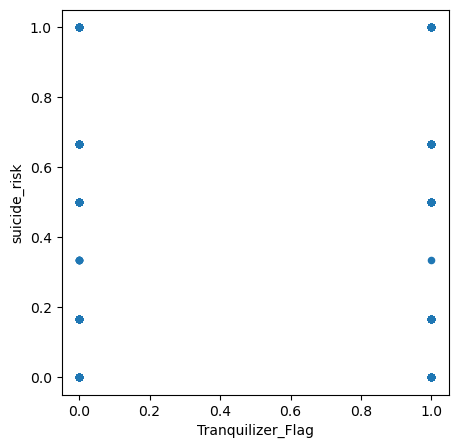

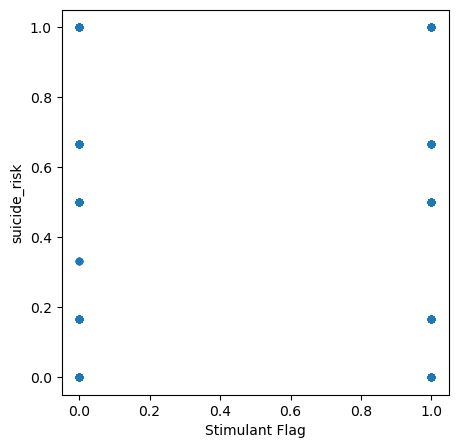

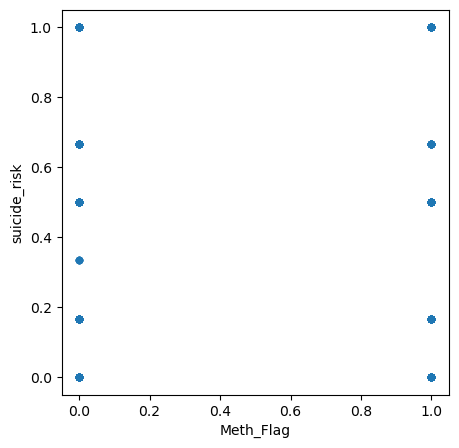

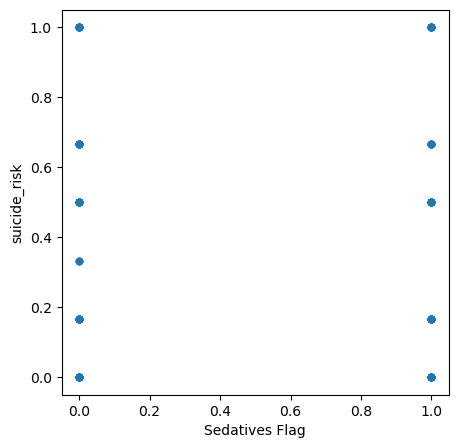

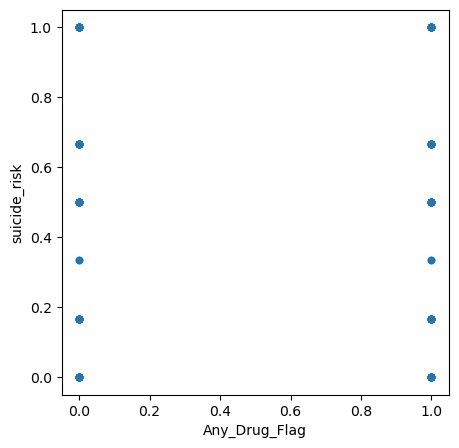

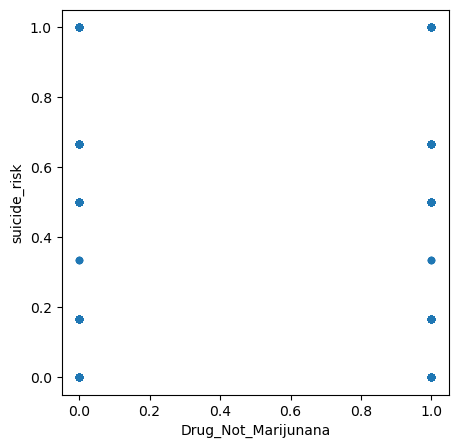

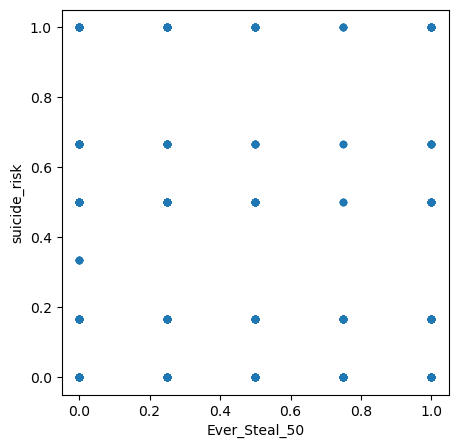

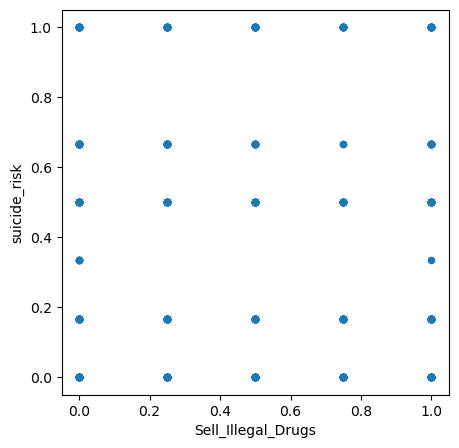

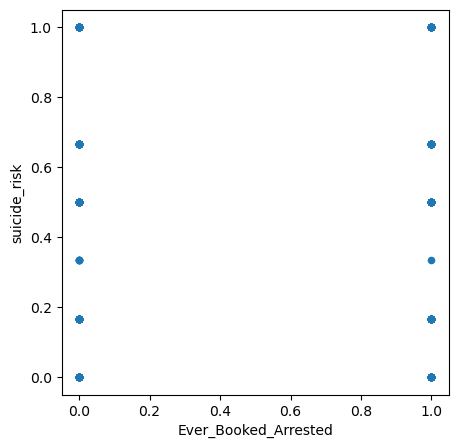

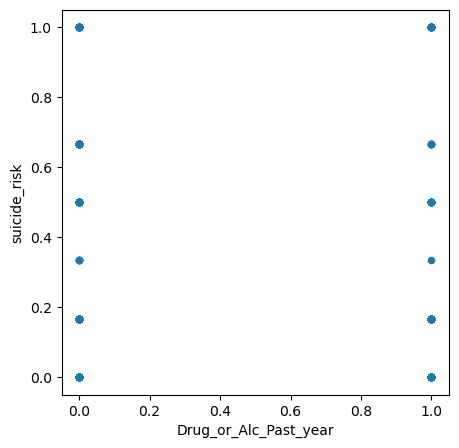

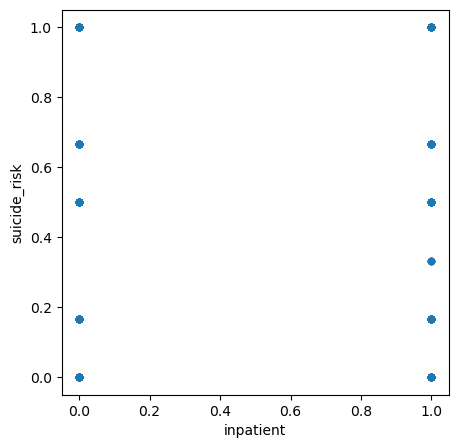

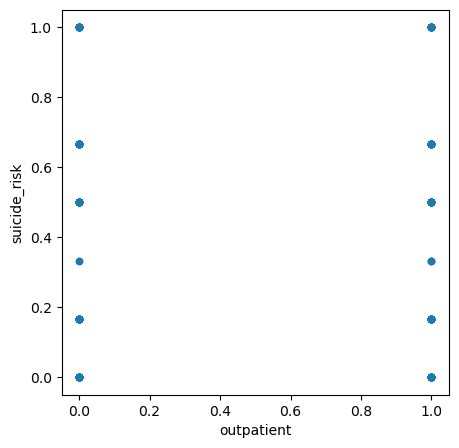

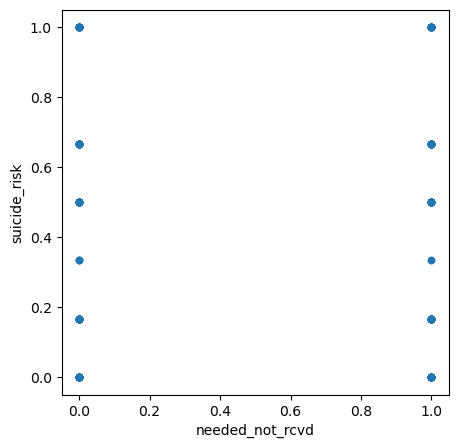

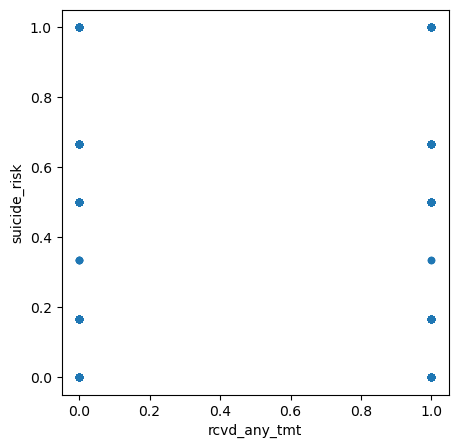

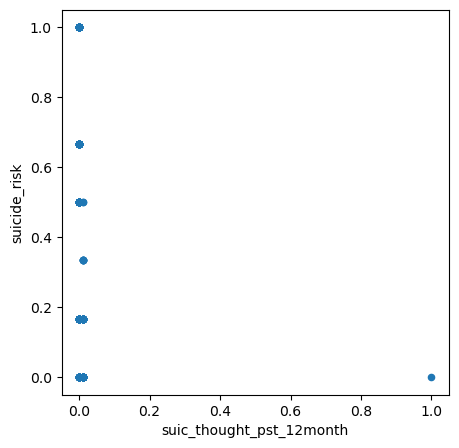

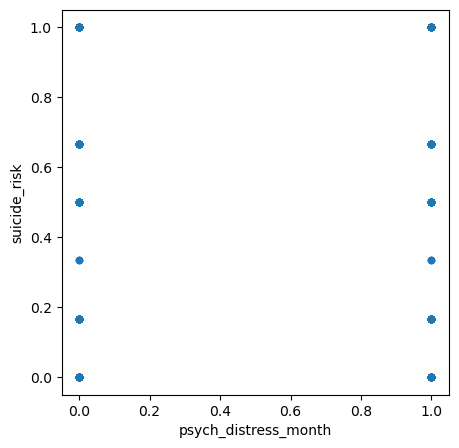

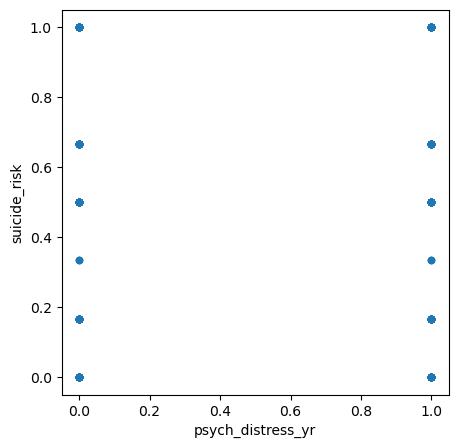

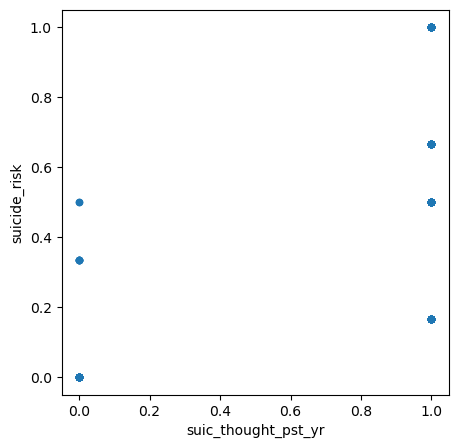

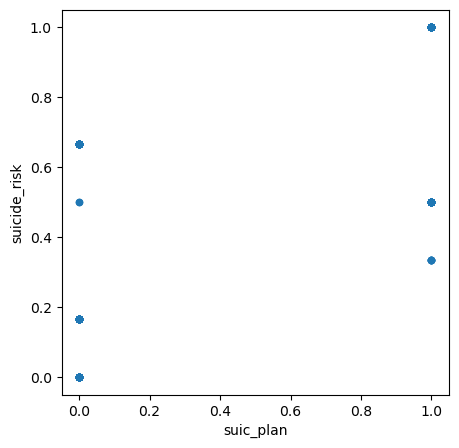

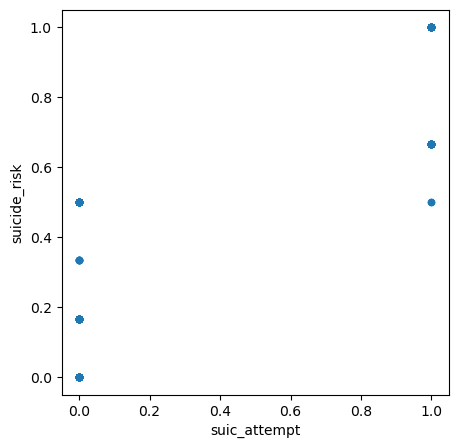

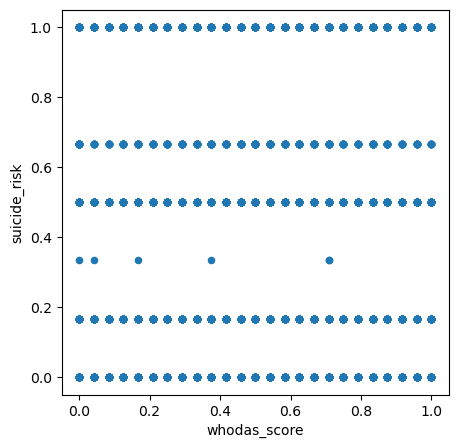

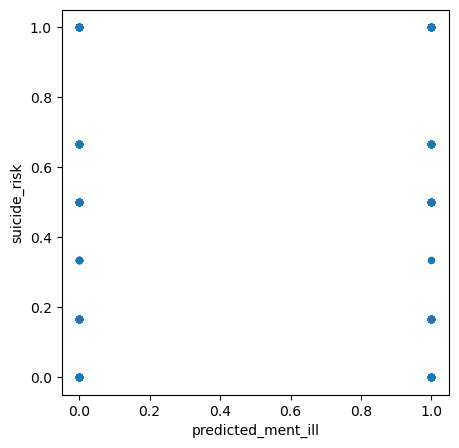

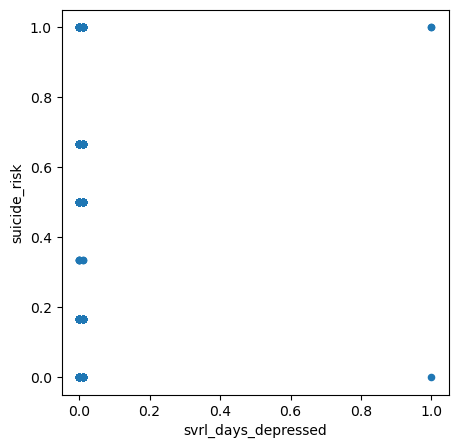

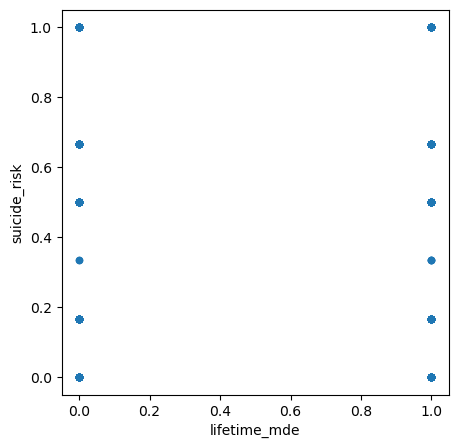

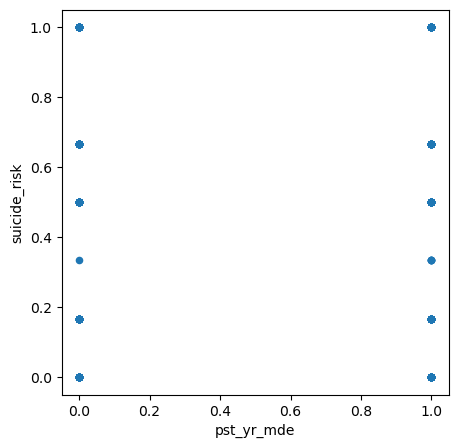

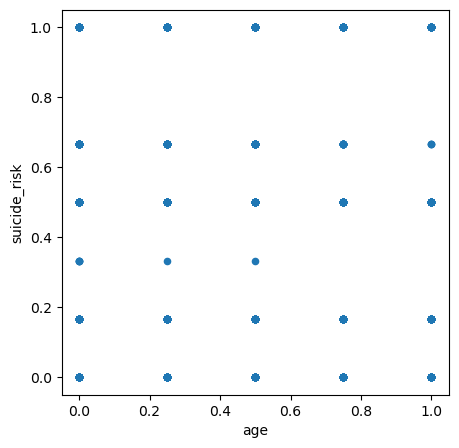

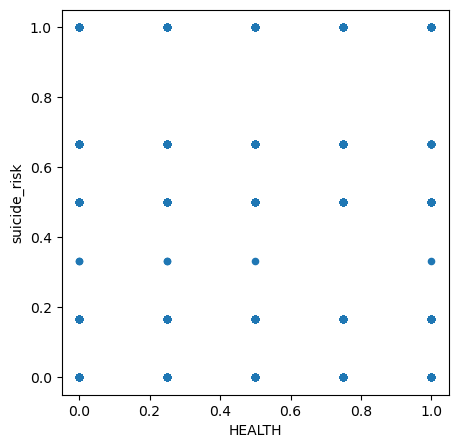

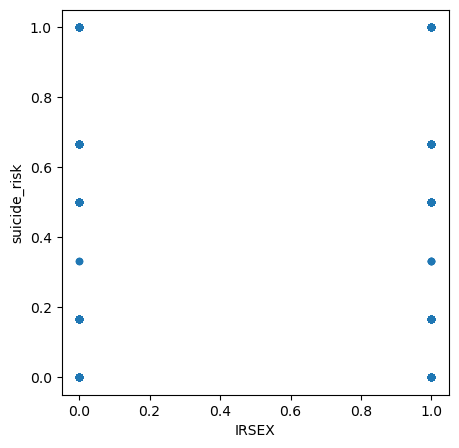

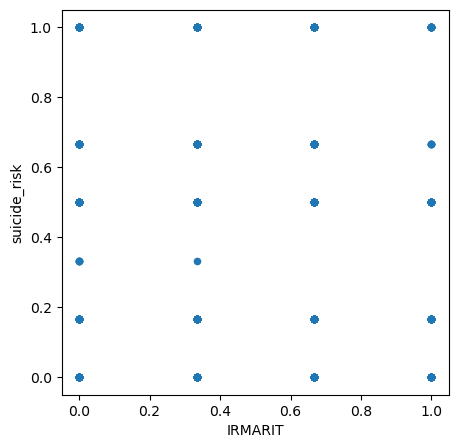

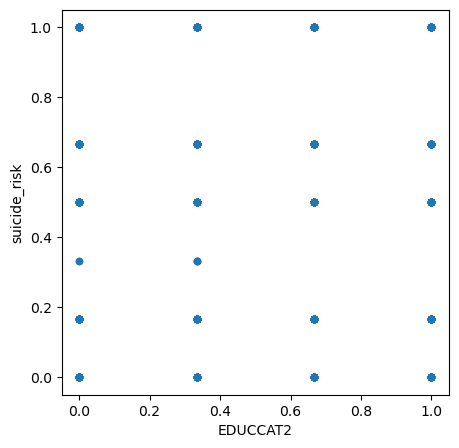

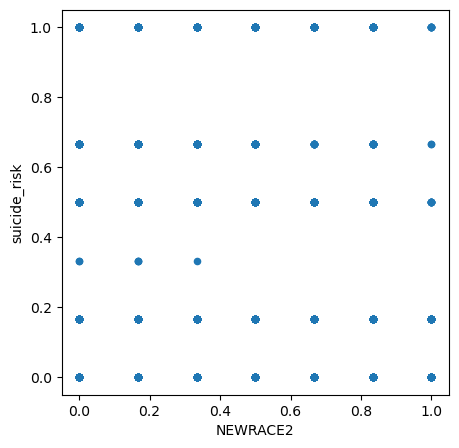

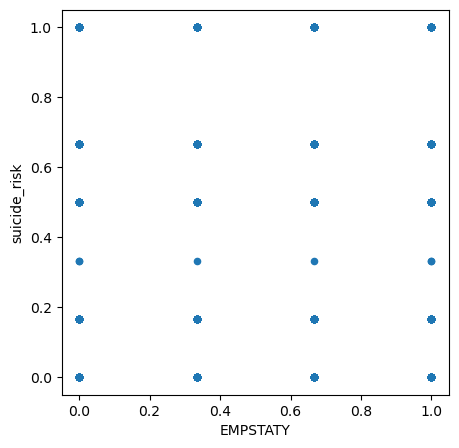

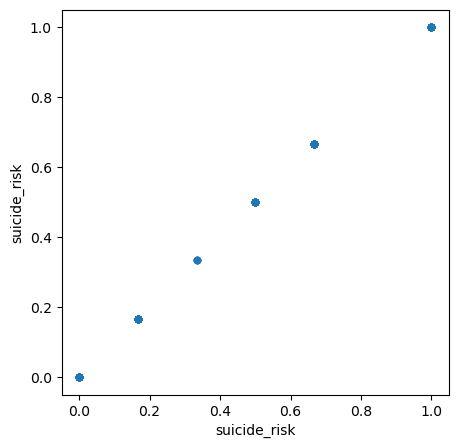

In [16]:
#scatter plot
for col in norm_data:
    norm_data.plot(kind = 'scatter', x = col, y = 'suicide_risk', figsize = (5, 5))

array([[<Axes: title={'center': 'NEWRACE2'}>,
        <Axes: title={'center': 'EMPSTATY'}>],
       [<Axes: title={'center': 'suicide_risk'}>, <Axes: >]], dtype=object)

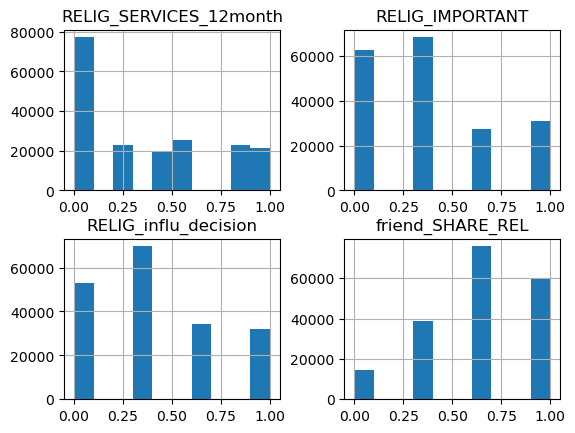

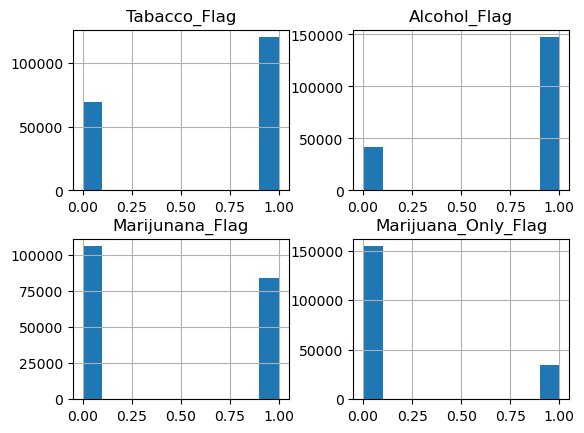

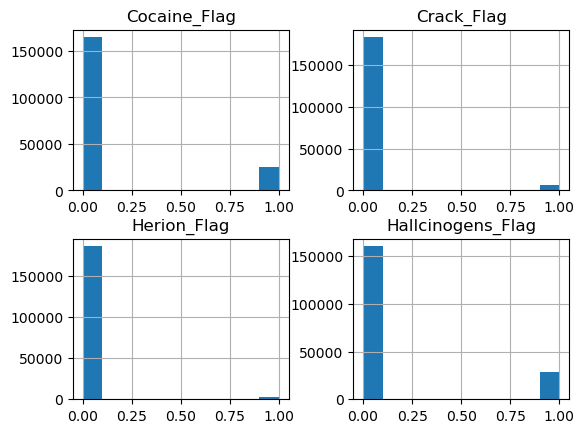

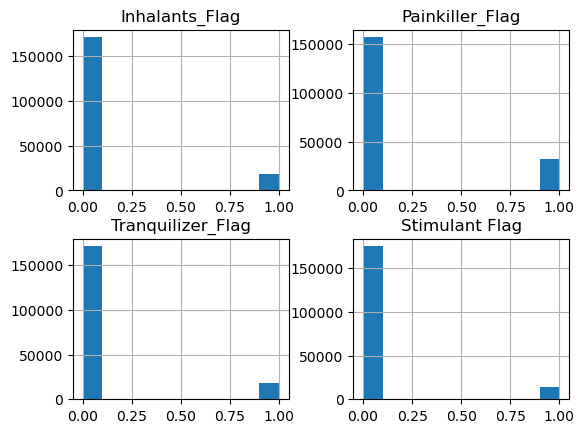

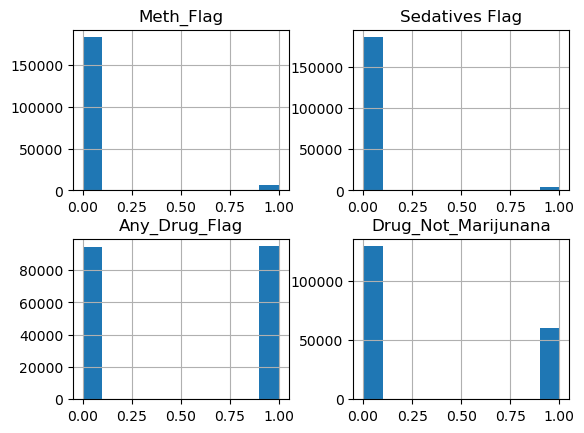

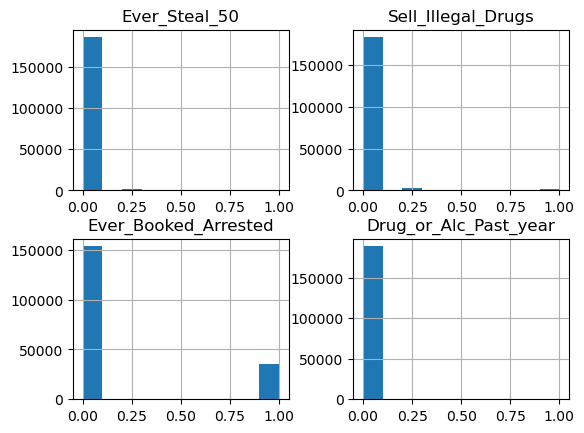

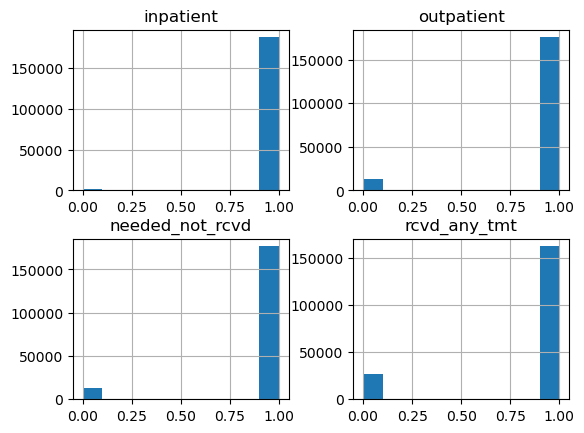

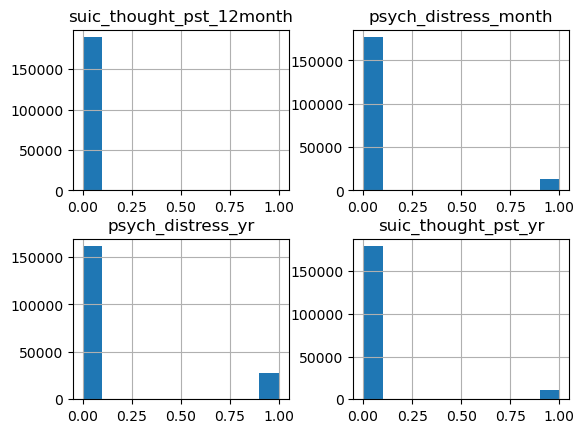

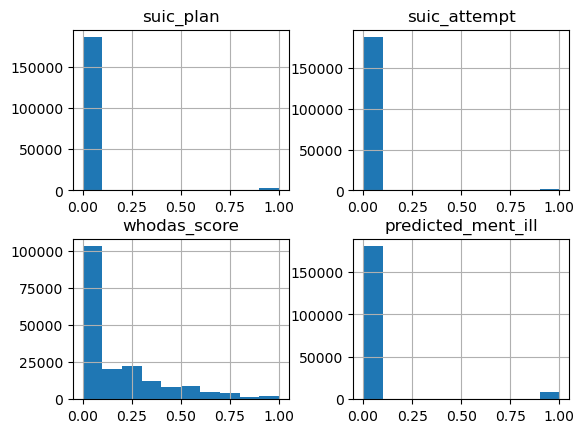

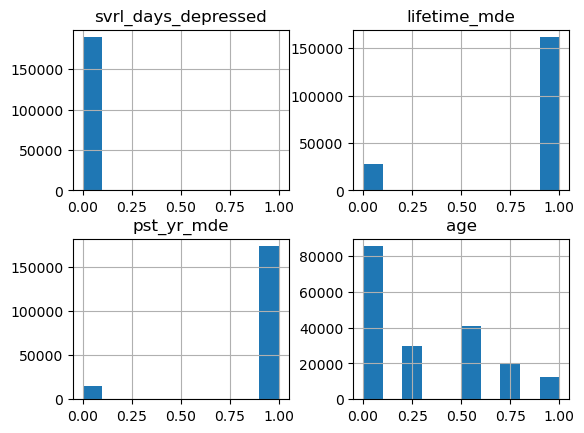

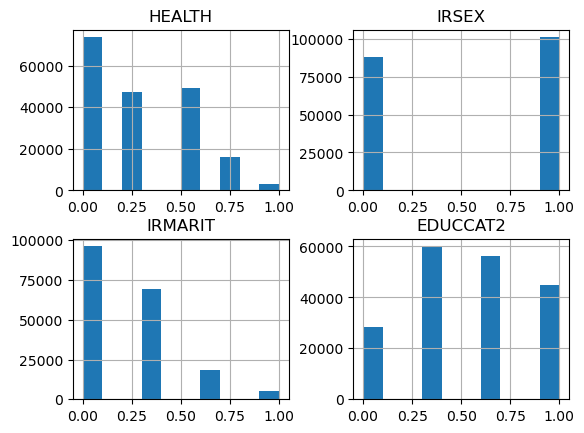

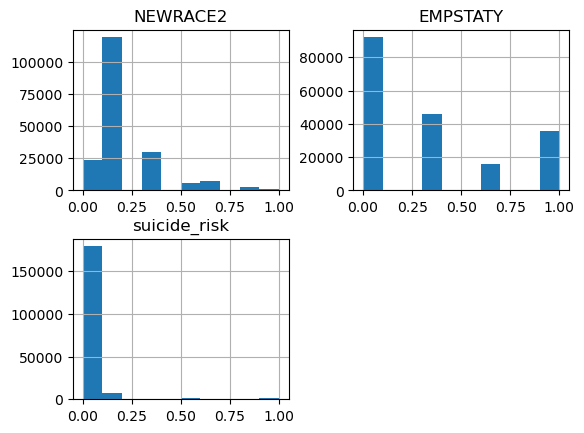

In [17]:
#histogram plot
lower = 0
upper = 4
while upper < len(norm_data.columns):
    norm_data[norm_data.columns[lower:upper]].hist()
    lower = upper
    upper = lower + 4
upper = len(norm_data.columns)
norm_data[norm_data.columns[lower:upper]].hist()

In [18]:
norm_data.columns

Index(['RELIG_SERVICES_12month', 'RELIG_IMPORTANT', 'RELIG_influ_decision',
       'friend_SHARE_REL', 'Tabacco_Flag', 'Alcohol_Flag', 'Marijunana_Flag',
       'Marijuana_Only_Flag', 'Cocaine_Flag', 'Crack_Flag', 'Herion_Flag',
       'Hallcinogens_Flag', 'Inhalants_Flag', 'Painkiller_Flag',
       'Tranquilizer_Flag', 'Stimulant Flag', 'Meth_Flag', 'Sedatives Flag',
       'Any_Drug_Flag', 'Drug_Not_Marijunana', 'Ever_Steal_50',
       'Sell_Illegal_Drugs', 'Ever_Booked_Arrested', 'Drug_or_Alc_Past_year',
       'inpatient', 'outpatient', 'needed_not_rcvd', 'rcvd_any_tmt',
       'suic_thought_pst_12month', 'psych_distress_month', 'psych_distress_yr',
       'suic_thought_pst_yr', 'suic_plan', 'suic_attempt', 'whodas_score',
       'predicted_ment_ill', 'svrl_days_depressed', 'lifetime_mde',
       'pst_yr_mde', 'age', 'HEALTH', 'IRSEX', 'IRMARIT', 'EDUCCAT2',
       'NEWRACE2', 'EMPSTATY', 'suicide_risk'],
      dtype='object')

### Specific Exploration (only those whose correlation score ~ 25%)
Explore in the order of decreasing correlation, starting from *predicted_ment_ill*

In [41]:
corr_in_order[:15] #in decreasing correlation

[('suicide_risk', 1.0),
 ('suic_plan', 0.858),
 ('suic_attempt', 0.819),
 ('suic_thought_pst_yr', 0.764),
 ('suic_thought_pst_12month', -0.582),
 ('predicted_ment_ill', 0.459),
 ('psych_distress_yr', 0.301),
 ('psych_distress_month', 0.299),
 ('pst_yr_mde', -0.292),
 ('whodas_score', 0.262),
 ('lifetime_mde', -0.245),
 ('needed_not_rcvd', -0.243),
 ('inpatient', -0.229),
 ('outpatient', -0.179),
 ('rcvd_any_tmt', -0.178)]

#### predicted_ment_ill & suicide_risk
1. 8861 individuals are predicted to have mental illness. 732 (i.e., around 10%) has 1.0 risk of committing suicide. 2 2. Overall, except for the group where suicide_risk == 0, # of individuals who experience distress >= # of individuals who don't, in the rest of the groups that are all associated to some level of suicide_risk.
3. ~62% of individuals predicted to have mental illness also have a risk > 0, with ~25% having a risk >= 0.5.
4. individuals who are NOT predicted to have mental illness are also more associated with a higher risk compared to a similar feature: psych_distress_yr (see below) 

In [19]:
#count() returns the same series regardless of columns. I use age in this case
ment_risk = norm_data.groupby(['suicide_risk','predicted_ment_ill']).count()[['age']] 
ment_risk

age
suicide_risk predicted_ment_ill        
0.000000     0.0                 175725
             1.0                   3220
0.166667     0.0                   3362
             1.0                   3433
0.333333     0.0                      5
             1.0                      1
0.500000     0.0                    619
             1.0                   1277
0.666667     0.0                    176
             1.0                    198
1.000000     0.0                    547
             1.0                    732

In [20]:
norm_data[norm_data['predicted_ment_ill'] == 1.0].shape[0]

8861

#### psych_distress_yr & suicide_risk
27833 individuals experience "SERIOUS PSYCHOLOGICAL DISTRESS" in the past few years. More then 2500 of them (i.e., around 10%) has a 1.0 risk of committing suicide. 
1. Overall, except for the group where suicide_risk == 0, # of individuals who experience distress >= # of individuals who don't in the rest of the groups that are all associated to some level of suicide_risk. 
2. ~25% of individuals experiencing "SERIOUS PSYCHOLOGICAL DISTRESS" have a risk > 0, while only ~1% of those who don't experience distress are indicated to have a risk > 0
3. ~10% of individuals experiencing "SERIOUS PSYCHOLOGICAL DISTRESS" have a risk >= 0.5, which is < than the statistic of predicted_ment_ill

In [21]:
psyc_risk = norm_data.groupby(['suicide_risk','psych_distress_yr']).count()[['age']]
psyc_risk

age
suicide_risk psych_distress_yr        
0.000000     0.0                158156
             1.0                 20789
0.166667     0.0                  2491
             1.0                  4304
0.333333     0.0                     3
             1.0                     3
0.500000     0.0                   412
             1.0                  1484
0.666667     0.0                   109
             1.0                   265
1.000000     0.0                   291
             1.0                   988

In [22]:
norm_data[norm_data['psych_distress_yr'] == 1].shape[0]

27833

#### pst_yr_mde (experienced major depressive episode past year) & suicide_risk;  lifetime_mde & suicide_risk
1. 15331 individuals experienced mde past year, 32% have a risk > 0. Specifically, 13% have a risk >= 0.5. More percentage of those individuals are distributed in the risk > 0 area here than in psych_distress_yr, but there are less individuals in absolute terms, which may contribute to the slight difference between their correlation score to suicide_risk (~|0.01|)

2. number of individuals experiencing lifetime_mde > number of individuals experiencing pst_yr_mde (12000 more), but the large majority still does not experience mde of any kind (~90% of the sample size)

3. 27692 individuals experienced mde in their lifetime. 22% of them has a risk > 0, 5% have a risk >= 0.5. Therefore, lifetime_mde seems to contribute less to suicide_risk than pst_yr_mde in this sample.

In [23]:
mde_yr_risk = norm_data.groupby(['suicide_risk','pst_yr_mde']).count()[['age']]
#note: #0 in pst_yr_mde means yes; 1 means no
mde_yr_risk

age
suicide_risk pst_yr_mde        
0.000000     0.0          10366
             1.0         168579
0.166667     0.0           2960
             1.0           3835
0.333333     0.0              1
             1.0              5
0.500000     0.0           1164
             1.0            732
0.666667     0.0            168
             1.0            206
1.000000     0.0            672
             1.0            607

In [24]:
norm_data[norm_data['pst_yr_mde'] == 0.0].shape[0]

15331

In [25]:
norm_data['pst_yr_mde'].describe()

count    189295.00000
mean          0.91901
std           0.27282
min           0.00000
25%           1.00000
50%           1.00000
75%           1.00000
max           1.00000
Name: pst_yr_mde, dtype: float64

In [26]:
mde_life_risk = norm_data.groupby(['suicide_risk','lifetime_mde']).count()[['age']] 
##0 in pst_yr_mde means yes; 1 means no
mde_life_risk

age
suicide_risk lifetime_mde        
0.000000     0.0            21564
             1.0           157381
0.166667     0.0             3784
             1.0             3011
0.333333     0.0                2
             1.0                4
0.500000     0.0             1355
             1.0              541
0.666667     0.0              209
             1.0              165
1.000000     0.0              778
             1.0              501

In [27]:
norm_data[norm_data['lifetime_mde'] == 0.0].shape[0]

27692

In [28]:
norm_data['lifetime_mde'].describe()
# mean is lower: more individuals experience mde in lifetime than in past year

count    189295.000000
mean          0.853710
std           0.353398
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: lifetime_mde, dtype: float64

#### whodas_score & suicide_risk: (whodas_score indicates the level of difficulty in performing daily activities due to problems with emotions, nerves, or mental health; is continuous).

1) the mean of whodas_score is a lot above 0 after normalization
2) except for the group where suicide_risk == 0, the whodas_scores are relatively large for the rest of the risk groups

In [29]:
norm_data['whodas_score'].describe()

count    189295.000000
mean          0.173461
std           0.224779
min           0.000000
25%           0.000000
50%           0.083333
75%           0.291667
max           1.000000
Name: whodas_score, dtype: float64

In [30]:
whodas_risk = norm_data.groupby(['suicide_risk'])['whodas_score'].median()
whodas_risk
#note: only 6 observations for the group where suicide_risk == 0.33

suicide_risk
0.000000    0.083333
0.166667    0.458333
0.333333    0.270833
0.500000    0.583333
0.666667    0.500000
1.000000    0.500000
Name: whodas_score, dtype: float64

#### needed_not_rcvd & suicide_risk
needed_not_rcvd: feeling a perceived need for mental health treatment/counseling that was not received

1. 12542 individuals didn't receive treatment they feel needed, 6% of the sample. (what is the % of people feeling a need for treatment though?)
2. ~ 30% has a risk > 0. ~12% has a risk >= 0.5. 
3. <b>observe: for almost all groups of risks, # individuals whose "needed_not_rcvd" == 0 > # individuals whose "needed_not_rcvd" == 1.</b> It can be partly explained by the fact that the majority is contributed by those whose "needed_not_rcvd" == 0, but it also applies for other features like the ones above, which doesn't have this phenomenon. 

In [31]:
need_risk = norm_data.groupby(['suicide_risk','needed_not_rcvd']).count()[['age']] 
#0 means yes, 1 means no here
need_risk

age
suicide_risk needed_not_rcvd        
0.000000     0.0                8708
             1.0              170237
0.166667     0.0                2316
             1.0                4479
0.333333     0.0                   4
             1.0                   2
0.500000     0.0                 857
             1.0                1039
0.666667     0.0                 133
             1.0                 241
1.000000     0.0                 524
             1.0                 755

In [32]:
norm_data[norm_data['needed_not_rcvd'] == 0.0].shape[0]

12542